In [ ]:
!pip install wordcloud textblob matplotlib seaborn pillow

In [ ]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from textblob import TextBlob

import matplotlib.pyplot as plt

from wordcloud import WordCloud

import seaborn as sns

from PIL import Image

In [ ]:
from google.colab import files
import io

# Upload the file
uploaded = files.upload()

# Get the name of the uploaded file
file_path = next(iter(uploaded))  # This gets the first key in the uploaded dictionary, which is the file name

# Load the CSV file into a DataFrame
df = pd.read_csv(io.BytesIO(uploaded[file_path]))

# Display the first few rows of the DataFrame
print(df)

Saving twitter_dataset.csv to twitter_dataset (4).csv
      Tweet_ID         Username  \
0            1          julie81   
1            2    richardhester   
2            3   williamsjoseph   
3            4      danielsmary   
4            5       carlwarren   
...        ...              ...   
9995      9996            ntate   
9996      9997   garrisonjoshua   
9997      9998  adriennejackson   
9998      9999         kcarlson   
9999     10000       vdickerson   

                                                   Text  Retweets  Likes  \
0     Party least receive say or single. Prevent pre...         2     25   
1     Hotel still Congress may member staff. Media d...        35     29   
2     Nice be her debate industry that year. Film wh...        51     25   
3     Laugh explain situation career occur serious. ...        37     18   
4     Involve sense former often approach government...        27     80   
...                                                 ...       ...    

In [ ]:
# This will print all column names in the DataFrame
print(df.columns)


Index(['Tweet_ID', 'Username', 'Text', 'Retweets', 'Likes', 'Timestamp'], dtype='object')


In [ ]:
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


In [ ]:
df.describe()

,Tweet_ID,Retweets,Likes
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,49.721200,49.929300
std,2886.89568,28.948856,28.877193
min,1.00000,0.000000,0.000000
25%,2500.75000,25.000000,25.000000
50%,5000.50000,49.000000,50.000000
75%,7500.25000,75.000000,75.000000
max,10000.00000,100.000000,100.000000


In [ ]:
df.isnull().sum()

Tweet_ID     0
Username     0
Text         0
Retweets     0
Likes        0
Timestamp    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Remove duplicate tweets
# df = df.drop_duplicates()

# Remove rows with missing values
# df = df.dropna()

# Clean tweet text by removing special characters and URLs
df['Text'] = df['Text'].str.replace('[^a-zA-Z0-9\s]', '')
df['Text'] = df['Text'].str.replace('http\S+|www.\S+', '', case=False)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import pandas as pd

# Download the stopwords corpus
nltk.download('stopwords')

# Download the punkt tokenizer models
nltk.download('punkt')

# Now you can safely use word_tokenize
from nltk.tokenize import word_tokenize

# Your dataframe processing can continue here...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Tokenize tweet text
df['tokens'] = df['Text'].apply(lambda x: nltk.word_tokenize(x))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Stemming or Lemmatization
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
# Calculate summary statistics
mean_retweets = df['Retweets'].mean()
median_likes = df['Likes'].median()
correlation = df['Retweets'].corr(df['Likes'])

In [ ]:
# Perform sentiment analysis on tweet text
df['sentiment_polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
# Print results
print("Mean Retweets:", mean_retweets)
print("Median Likes:", median_likes)
print("Correlation between Retweets and Likes:", correlation)

Mean Retweets: 49.7212
Median Likes: 50.0
Correlation between Retweets and Likes: 0.012797546201034809


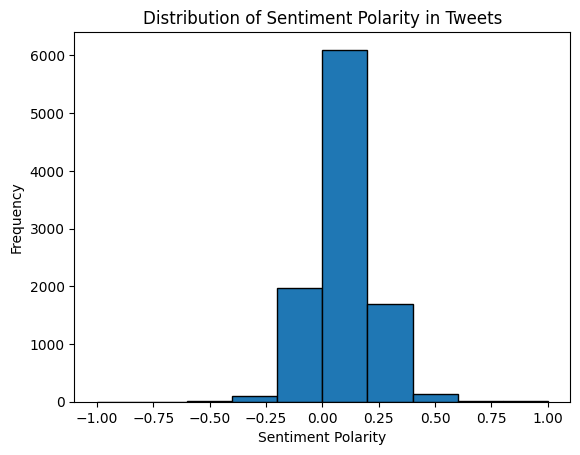

In [ ]:
# Plotting sentiment polarity distribution
plt.hist(df['sentiment_polarity'], bins=10, range=(-1, 1), edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity in Tweets')
plt.show()

In [ ]:
# Print the number of rows and columns in the dataset
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

# Calculate the average values of retweets and likes
avg_retweets = df['Retweets'].mean()
avg_likes = df['Likes'].mean()
print("Average Retweets:", avg_retweets)
print("Average Likes:", avg_likes)

Number of Rows: 10000
Number of Columns: 8
Average Retweets: 49.7212
Average Likes: 49.9293


In [ ]:
# Find the top users with the highest number of retweets
top_users = df.groupby('Username')['Retweets'].sum().nlargest(10)
print("Top Users by Retweets:")
print(top_users)

Top Users by Retweets:
Username
pjohnson           362
awilliams          306
fsmith             301
wmitchell          269
nbrown             267
davidsmith         263
christopher64      261
amiller            253
ehernandez         251
jessicawilliams    251
Name: Retweets, dtype: int64


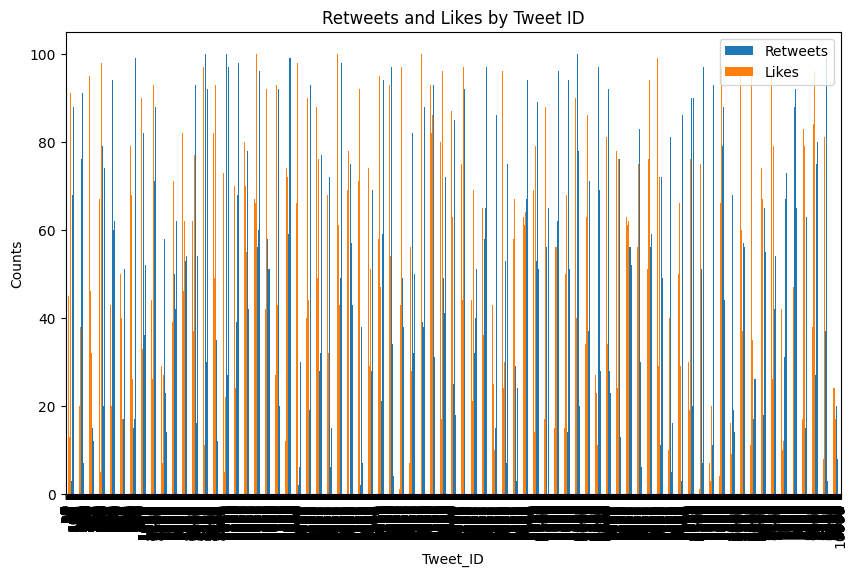

In [ ]:
# Create a bar chart of retweets and likes by Tweet_ID
# Make sure to pass the column names as a list
user_engagement = df.groupby('Tweet_ID')[['Retweets', 'Likes']].sum()
user_engagement.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Tweet_ID')
plt.ylabel('Counts')
plt.title('Retweets and Likes by Tweet ID')
plt.show()


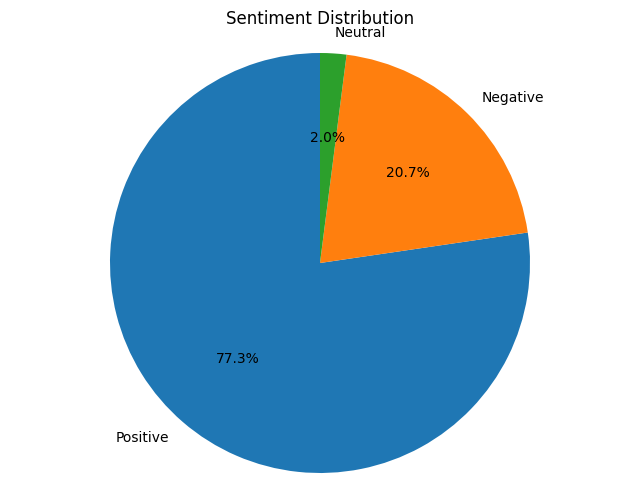

In [ ]:
# Perform sentiment analysis on tweet text
df['Sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment into positive, negative, and neutral
df['Sentiment Category'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# Calculate the count of each sentiment category
sentiment_counts = df['Sentiment Category'].value_counts()

# Plot a pie chart of sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()

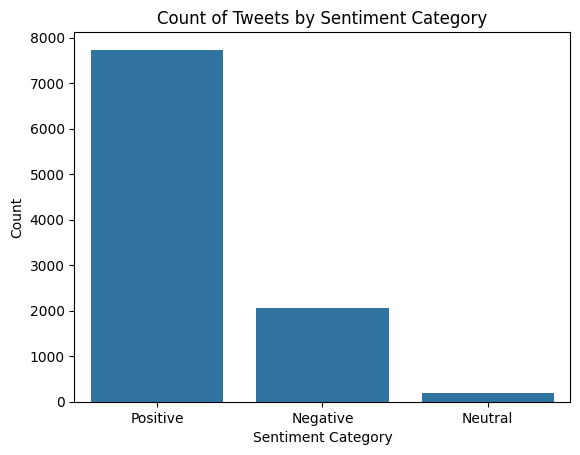

In [ ]:
# Plot the count of tweets by sentiment category
sns.countplot(x='Sentiment Category', data=df)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Count of Tweets by Sentiment Category')
plt.show()

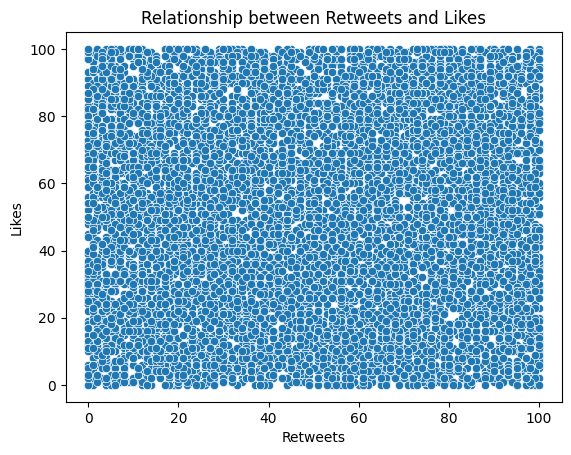

In [ ]:
# Plot the relationship between retweets and likes
sns.scatterplot(x='Retweets', y='Likes', data=df)
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.title('Relationship between Retweets and Likes')
plt.show()

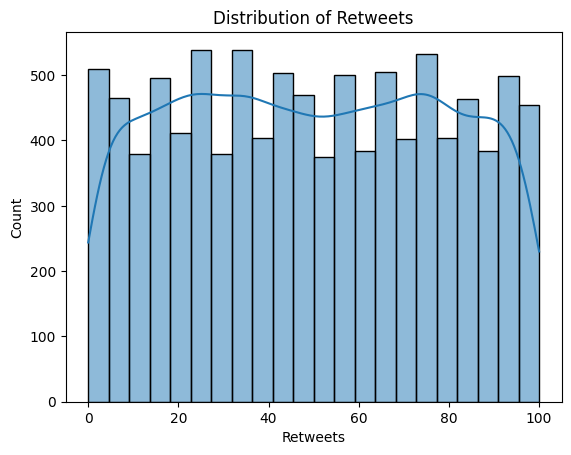

In [ ]:
 #Plot the distribution of retweets
sns.histplot(df['Retweets'], kde=True)
plt.xlabel('Retweets')
plt.ylabel('Count')
plt.title('Distribution of Retweets')
plt.show()


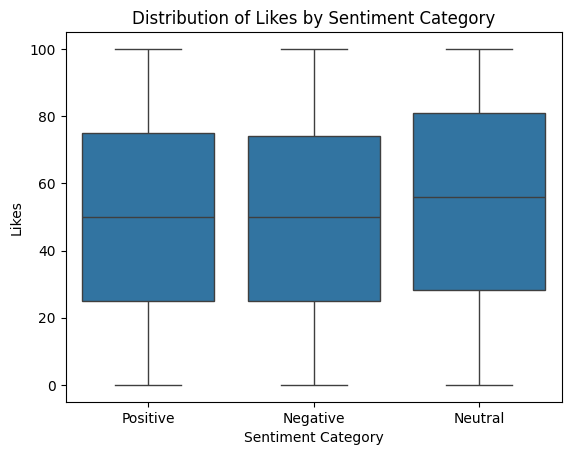

In [ ]:
# Plot the distribution of likes by sentiment category
sns.boxplot(x='Sentiment Category', y='Likes', data=df)
plt.xlabel('Sentiment Category')
plt.ylabel('Likes')
plt.title('Distribution of Likes by Sentiment Category')
plt.show()

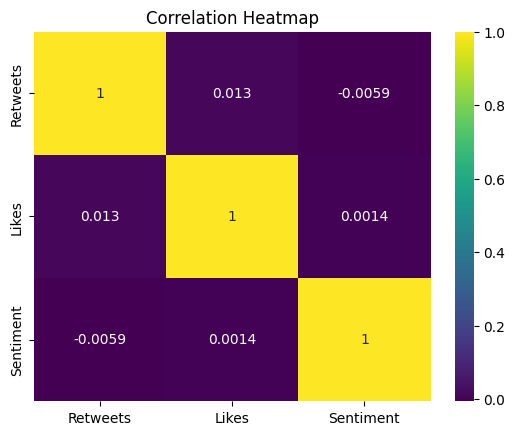

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['Retweets', 'Likes', 'Sentiment']].corr()

# Plot the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

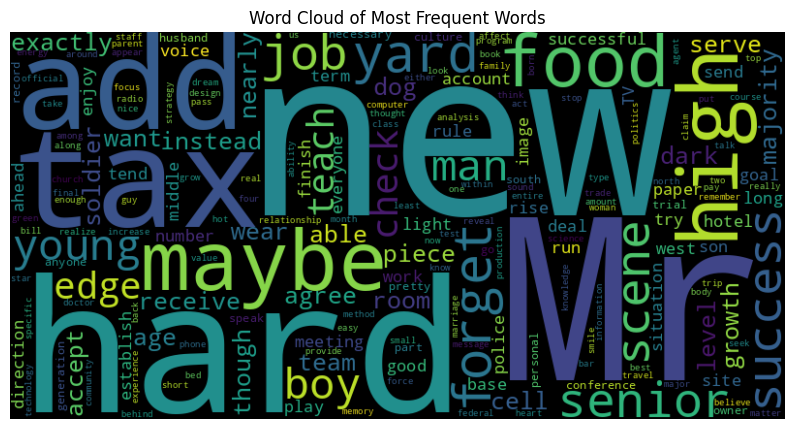

In [ ]:
# Combine all tweet texts into a single string
all_text = ' '.join(df['Text'])

# Generate a word cloud of the most frequent words
wordcloud = WordCloud(width=800, height=400).generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

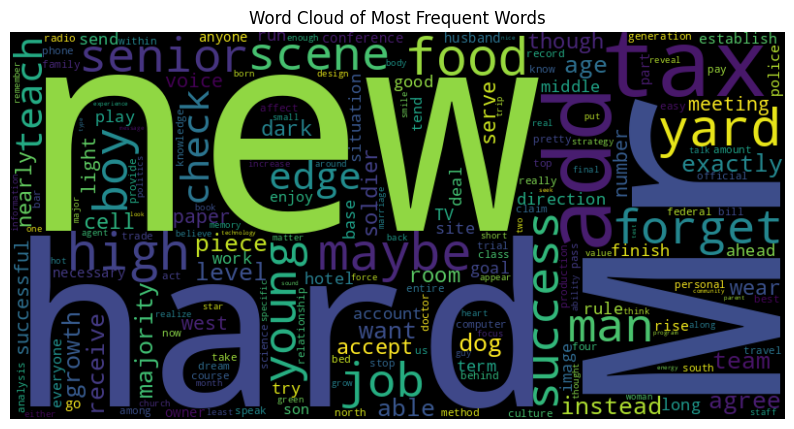

In [ ]:
# Combine all tweet texts into a single string
all_text = ' '.join(df['Text'])

# Generate a word cloud of the most frequent words
wordcloud = WordCloud(width=800, height=400).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

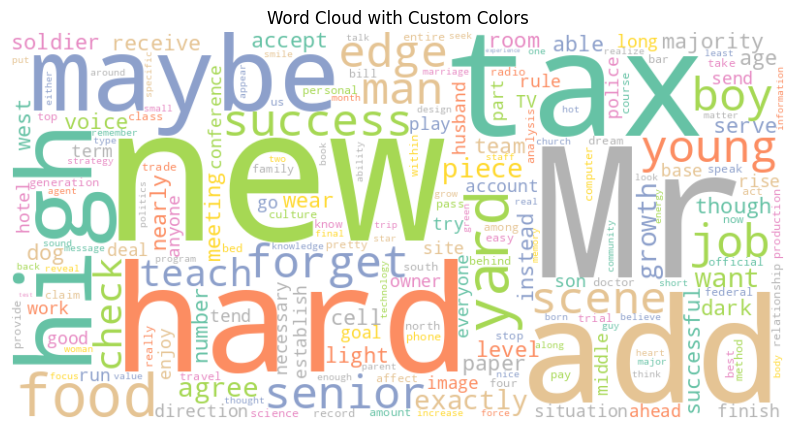

In [ ]:
# Generate a word cloud with custom colors
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud with Custom Colors')
plt.show()

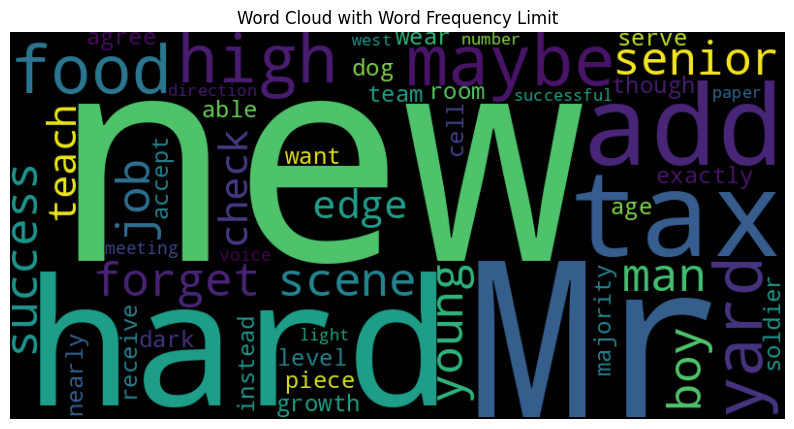

In [ ]:
# Set a word frequency limit
wordcloud = WordCloud(width=800, height=400, max_words=50).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud with Word Frequency Limit')
plt.show()

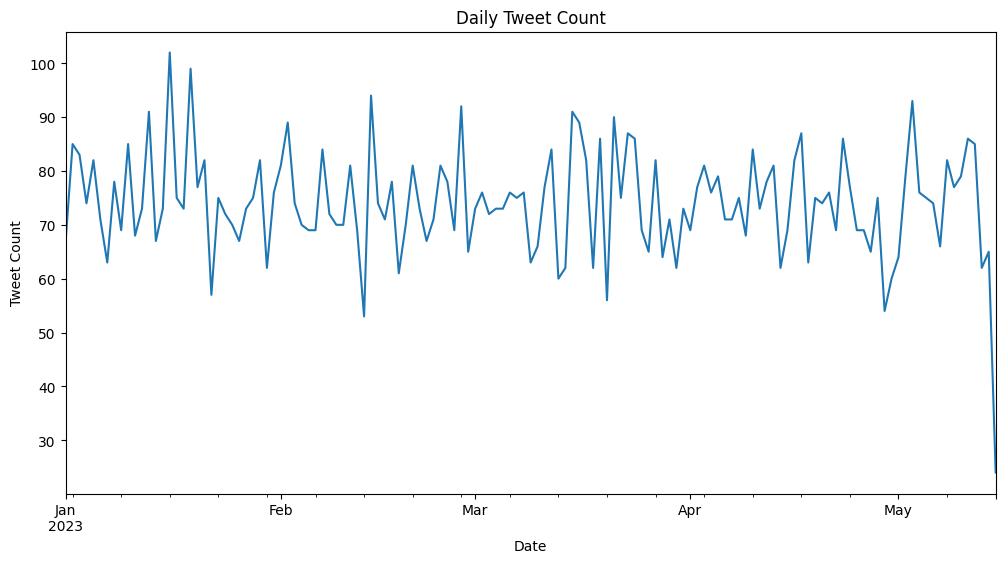

In [ ]:
# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the 'Timestamp' column as the DataFrame index
df.set_index('Timestamp', inplace=True)

# Resample the data by day and calculate the count of tweets per day
daily_tweet_count = df['Tweet_ID'].resample('D').count()

# Plot the time series of daily tweet count
plt.figure(figsize=(12, 6))
daily_tweet_count.plot()
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Daily Tweet Count')
plt.show()

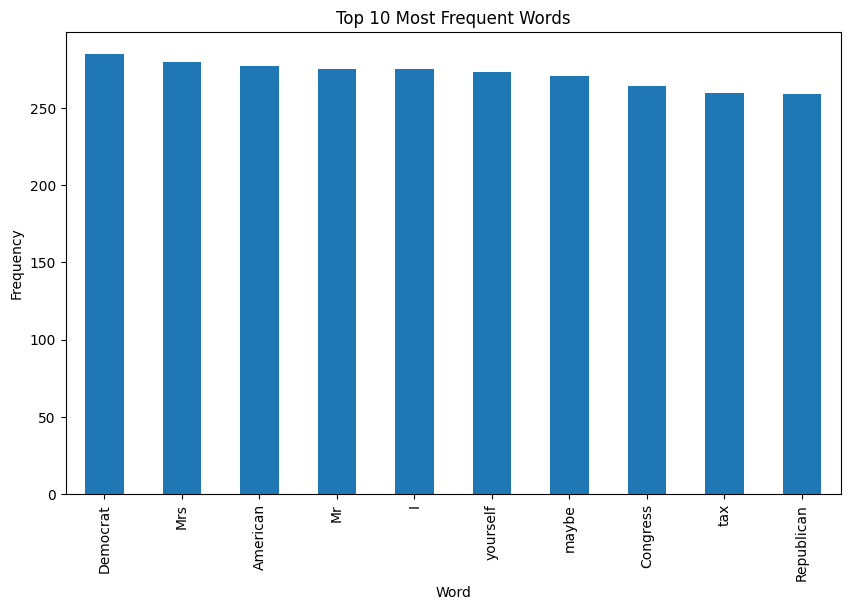

In [ ]:
# Combine all tweet texts into a single string
all_text = ' '.join(df['Text'])

# Split the text into individual words
words = all_text.split()

# Calculate the frequency of each word
word_counts = pd.Series(words).value_counts().sort_values(ascending=False)

# Plot the top 10 most frequent words
plt.figure(figsize=(10, 6))
word_counts.head(10).plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.show()

In [ ]:
##DataWrangling
# Example: Group by and aggregate
#grouped_data = df.groupby('category').agg({'numerical_column': 'mean'})

# Convert categories to a numerical encoding
#label_encoder = LabelEncoder()
#df['category_encoded'] = label_encoder.fit_transform(df['category'])


In [ ]:
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,tokens,sentiment_polarity,Sentiment,Sentiment Category
Timestamp,,,,,,,,,
2023-01-30 11:00:51,1,julie81,Party least receive say or single. Prevent pre...,2,25,"[parti, least, receiv, say, singl, ., prevent,...",0.115714,0.115714,Positive
2023-01-02 22:45:58,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,"[hotel, still, congress, may, member, staff, ....",0.308333,0.308333,Positive
2023-01-18 11:25:19,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,"[nice, debat, industri, year, ., film, gener, ...",0.220000,0.220000,Positive
2023-04-10 22:06:29,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,"[laugh, explain, situat, career, occur, seriou...",0.054762,0.054762,Positive
2023-01-24 07:12:21,5,carlwarren,Involve sense former often approach government...,27,80,"[involv, sens, former, often, approach, govern...",0.033333,0.033333,Positive


In [ ]:
from textblob import TextBlob

# Function to calculate sentiment
def get_tweet_sentiment(tweet):
    # create TextBlob object of passed tweet text
    analysis = TextBlob(tweet)
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Applying the function to the 'Text' column
df['Sentiment'] = df['Text'].apply(get_tweet_sentiment)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Example: Feature selection and model training
X = df[['Retweets', 'Likes']]  # select your features
y = df['Sentiment']  # target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

In [ ]:
pip install --upgrade scikit-learn


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(best_params)


{'max_depth': 10, 'n_estimators': 300}


In [ ]:
# Export the cleaned and preprocessed dataset for Tableau
df.to_csv('cleaned_data_for_tableau.csv', index=False)


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
#SupportVectorMachine
from sklearn.svm import SVC

# Initialize the Support Vector Classifier
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"Accuracy of SVM model: {svm_accuracy}")


Accuracy of SVM model: 0.778


In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Predictions
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Accuracy of Logistic Regression model: {logistic_accuracy}")


Accuracy of Logistic Regression model: 0.778


In [ ]:
#NaiveBayes
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predictions
nb_predictions = nb_model.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Accuracy of Naive Bayes model: {nb_accuracy}")


Accuracy of Naive Bayes model: 0.778


In [ ]:
!pip install --upgrade tensorflow


In [ ]:
import numpy as np
print(np.unique(y_train))


[0 1 2]


In [ ]:
#NeuralNetwork
from keras.models import Sequential
from keras.layers import Dense

# Define your model
nn_model = Sequential()
nn_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
nn_model.add(Dense(3, activation='softmax'))  # Adjust output units to match number of classes

# Compile and train the model
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test)
print(f"Accuracy of Neural Network model: {nn_accuracy}")


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.7422 - loss: 0.7502
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7879 - loss: 0.4669
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9055 - loss: 0.2975
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9402 - loss: 0.2060
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9492 - loss: 0.1678
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9647 - loss: 0.1307
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9744 - loss: 0.1039
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9833 - loss: 0.0883
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9853 - loss: 0.0732
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9920 - loss: 0.0606
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9202 - loss: 0.1971
Accuracy of Neural Network model: 0.9225000143051147


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Example of preprocessing text data
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['Text']).toarray()

# Example of encoding the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
